In [0]:
Copyright 2020, Author: Yuanning Zheng, College Station, TX, 77840 <br>
All rights reserved. Please do not delete this copyright statement.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from pathlib import Path
import os

In [0]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
MASTER_PATH =  '/content/drive/My Drive/AirInvestor/'

DATA_PATH = MASTER_PATH + 'Airbnb_data/'

OUTPUT_PATH = MASTER_PATH + 'outputs/'


In [0]:
#read out the stored airbnb data
df = pd.read_csv(MASTER_PATH + 'data_cla/predictions.csv' )
df.head()

,mls_id,description,0,1,2,3,4,5,6,label,price
0,14259981,New Build by Stonehollow Homes. and almost com...,0.003270,0.022230,0.065811,0.100673,0.273864,0.356728,0.177423,5,338.48132
1,14259967,Beautiful Stonehollow Home on wide 1 ACRE with...,0.001011,0.003735,0.010526,0.024679,0.108137,0.364256,0.487656,6,505.46290
2,14316135,"Country Home built in 2008, nice condition, gr...",0.037847,0.092995,0.124730,0.126314,0.258740,0.245664,0.113710,4,265.33426
3,56522084,This incredible Beazer home features high ceil...,0.013259,0.123480,0.245166,0.280775,0.205466,0.100830,0.031025,3,178.31386
4,204484,3/2/2 BRICK HOME THAT WAS COMPLETLY REMODELED ...,0.003825,0.014507,0.042634,0.075660,0.263137,0.395330,0.204907,5,363.34262


## Visualize predicted rental price

count    414.000000
mean     348.147173
std      139.194792
min       93.719536
30%      258.889611
50%      323.347320
70%      406.953654
90%      567.013950
95%      607.643870
max      686.234400
Name: price, dtype: float64


Text(0, 0.5, 'number of samples')

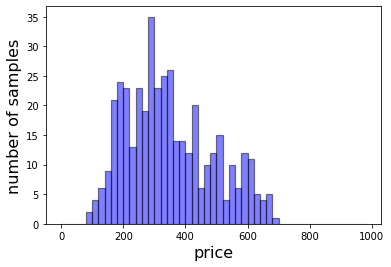

In [0]:
# Describe and visulize the distribution of price

print(df['price'].describe([0.30,0.5,0.70,0.9,0.95]))

bin_values = np.arange(start=0, stop=1000, step=20)

n, bins, patches = plt.hist(df['price'], bin_values, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=1.2)

plt.xlabel('price', fontsize=16)
plt.ylabel('number of samples', fontsize=16)

In [0]:
# split dataframe into those with high rental price value and those with low values
# df_high = df[df['label']>=4]
# df_low = df[df['label']<4]

df_high = df[df['price']>=406]
df_low = df[df['price']<=259]

print(df_high.shape, df_low.shape)

(125, 11) (124, 11)


In [0]:
# install nltk for tokenization
%pip install nltk

In [0]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# import stop words in order to filter out useless word
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Deal with high price data frame

tokenized_sentences = df_high['description'].apply(nltk.word_tokenize).tolist()
word_high = []
for sentence in tokenized_sentences:
  for word in sentence:
    if word not in stop_words and word.isalpha() :
      word_high.append(word.lower())

df_word_high = pd.DataFrame({'word': word_high})

df_word_high.head()

,word
0,beautiful
1,stonehollow
2,home
3,wide
4,acre


In [0]:
# Deal with low price data frame
tokenized_sentences = df_low['description'].apply(nltk.word_tokenize).tolist()
word_low = []
for sentence in tokenized_sentences:
  for word in sentence:
    if word not in stop_words and word.isalpha() :
      word_low.append(word.lower())

df_word_low = pd.DataFrame({'word': word_low})

df_word_low.head()

,word
0,this
1,incredible
2,beazer
3,home
4,features


In [0]:
# save word list of description of properties with low and high predicted rental price seperately
df_word_high.to_csv(MASTER_PATH + 'Mashvisor_data/description_word_high.csv', index = False)
df_word_low.to_csv(MASTER_PATH + 'Mashvisor_data/description_word_low.csv', index = False)
